# Robot Dog - Carpet Walk

**Author**: Tyler Marrs<br />
**Date**:   May 17, 2019

This notebook is used to illustrate how to use mass-ts; a library composed of similarity search algorithms in time series data. For this example, I will walk you through similarity search on the UCR data set - robot dog.

## Data Explaination

> The dataset comes from an accelerometer inside a Sony AIBO robot dog. The query comes from a period when the dog was walking on carpet, the test data we will search comes from a time the robot walked on cement (for 5000 data points), then carpet (for 3000 data points), then back onto cement.

Source: https://www.cs.unm.edu/~mueen/Simple_Case_Studies_Using_MASS.pptx

**Note**<br />
All of the code in this example is using Python 3.

In [1]:
import numpy as np
import mass_ts as mts
from matplotlib import pyplot as plt

%matplotlib inline

## Load Data

In [2]:
robot_dog = np.loadtxt('robot_dog.txt')
carpet_walk = np.loadtxt('carpet_query.txt')

## Plot Data

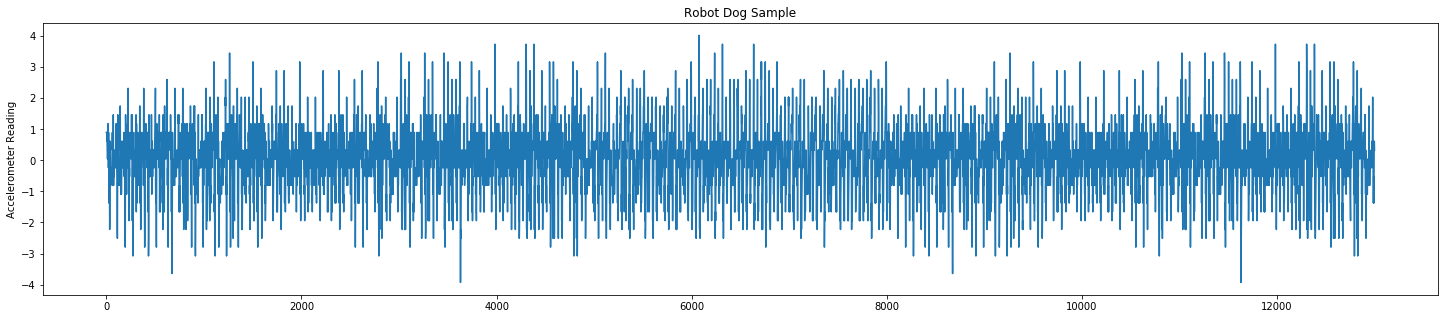

In [3]:
plt.figure(figsize=(25,5))
plt.plot(np.arange(len(robot_dog)), robot_dog)
plt.ylabel('Accelerometer Reading')
plt.title('Robot Dog Sample')
plt.show()

The series data for the robot dog is difficult to see a pattern unless you make the plot very large. At 25 by 5 you can see a pattern in the middle of the data set. This is where the carpet walk takes place.

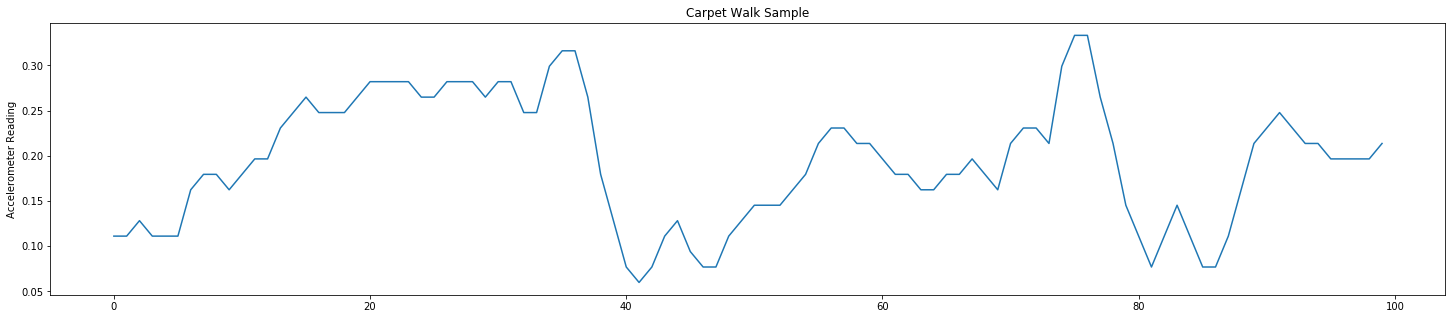

In [4]:
plt.figure(figsize=(25,5))
plt.plot(np.arange(len(carpet_walk)), carpet_walk)
plt.ylabel('Accelerometer Reading')
plt.title('Carpet Walk Sample')
plt.show()

# Search for Carpet Walk

Now we can search for the carpet walk snippet within the robot dog sample using MASS.

In [5]:
distances = mts.mass3(robot_dog, carpet_walk, 256)

In [6]:
min_idx = np.argmin(distances)

In [7]:
min_idx

7479

The minimum index found is the same as the author claims. We can now visualize this below.

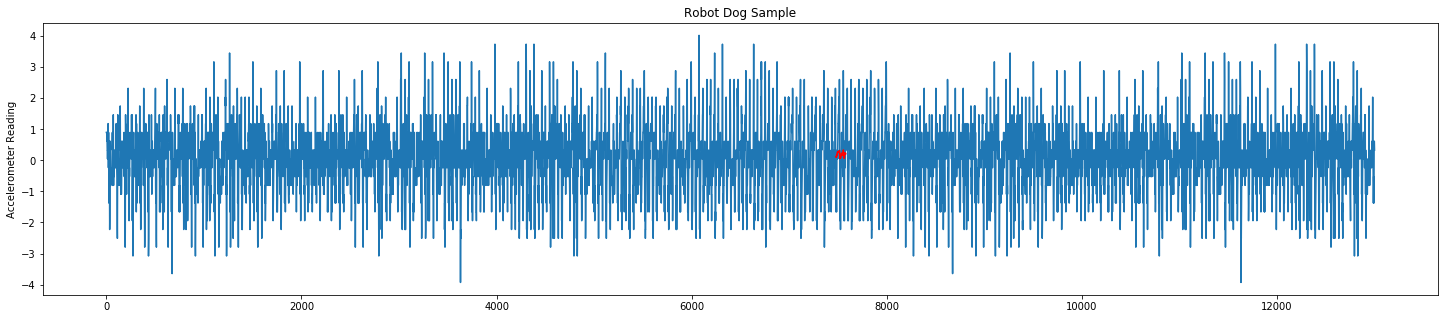

In [8]:
plt.figure(figsize=(25,5))
plt.plot(np.arange(len(robot_dog)), robot_dog)
plt.plot(np.arange(min_idx, min_idx + 100), carpet_walk, c='r')
plt.ylabel('Accelerometer Reading')
plt.title('Robot Dog Sample')
plt.show()

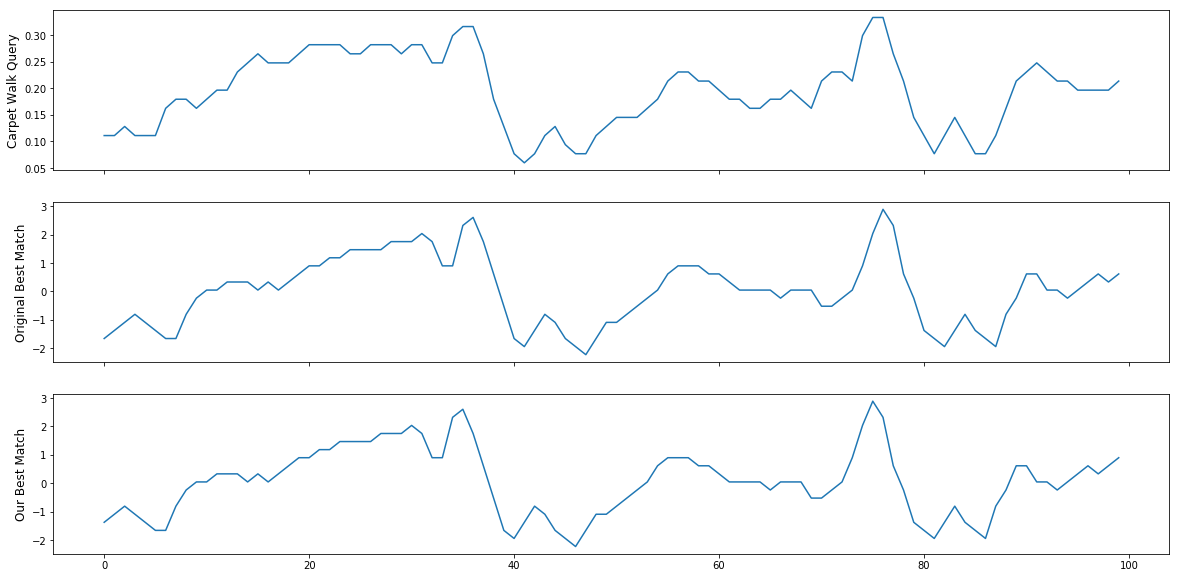

In [9]:
# Plot the carpet walk query
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(carpet_walk)), carpet_walk)
ax1.set_ylabel('Carpet Walk Query', size=12)

# Plot use case best match from original authors
ax2.plot(np.arange(100), robot_dog[7478:7478+100])
ax2.set_ylabel('Original Best Match', size=12)

# Plot our best match
ax3.plot(np.arange(100), robot_dog[min_idx:min_idx+100])
ax3.set_ylabel('Our Best Match', size=12)

plt.show()